<a href="https://colab.research.google.com/github/riteshm2710/sleep_disorder/blob/main/sleep_disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# prompt: /content/Sleep_health_and_lifestyle_dataset.csv
import pandas as pd
from IPython.display import display

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
display(df.head())  # Shows a neat, scrollable table


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [63]:
import pandas as pd
from IPython.display import display

# Load the dataset
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Drop 'Person ID' column (if it exists)
df = df.drop('Person ID', axis=1, errors='ignore')  # 'errors=ignore' prevents errors if column is missing

# Display the cleaned data
display(df.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [61]:
# Basic information about the dataset
print(df.info(), "\n")  # "\n" adds an extra newline


# Find missing values in the dataset
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           155 non-null    object 
 11  Systolic_BP              374 non-null    int64  
 12  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB
None 

Gender         

In [54]:
print(df.columns,"\n")



Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object') 



In [55]:
# Split Blood Pressure into two columns
if 'Blood Pressure' in df.columns:
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic_BP'] = pd.to_numeric(bp_split[0])
    df['Diastolic_BP'] = pd.to_numeric(bp_split[1])
    # Drop the original Blood Pressure column
    df = df.drop('Blood Pressure', axis=1)
else:
    print("Blood Pressure column already handled.")

# Import pandas
import pandas as pd

# Set display option to show all columns horizontally
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Now display the first few rows
print(df.head())


  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  Systolic_BP  Diastolic_BP
0   Male   27     Software Engineer             6.1                 6                       42             6   Overweight          77         4200            NaN          126            83
1   Male   28                Doctor             6.2                 6                       60             8       Normal          75        10000            NaN          125            80
2   Male   28                Doctor             6.2                 6                       60             8       Normal          75        10000            NaN          125            80
3   Male   28  Sales Representative             5.9                 4                       30             8        Obese          85         3000    Sleep Apnea          140            90
4   Male   28  Sales Representative             5.9    

In [56]:
# Statistical summary of numerical features
from IPython.display import display
display(df.describe())  # Shows a scrollable, neatly formatted table

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


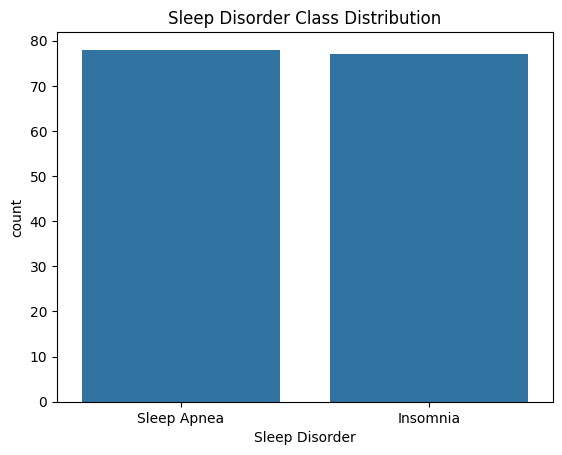

In [57]:
# How many people in each Sleep Disorder class?
print(df['Sleep Disorder'].value_counts())

# Visualize it with a bar plot
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Sleep Disorder Class Distribution')
plt.show()


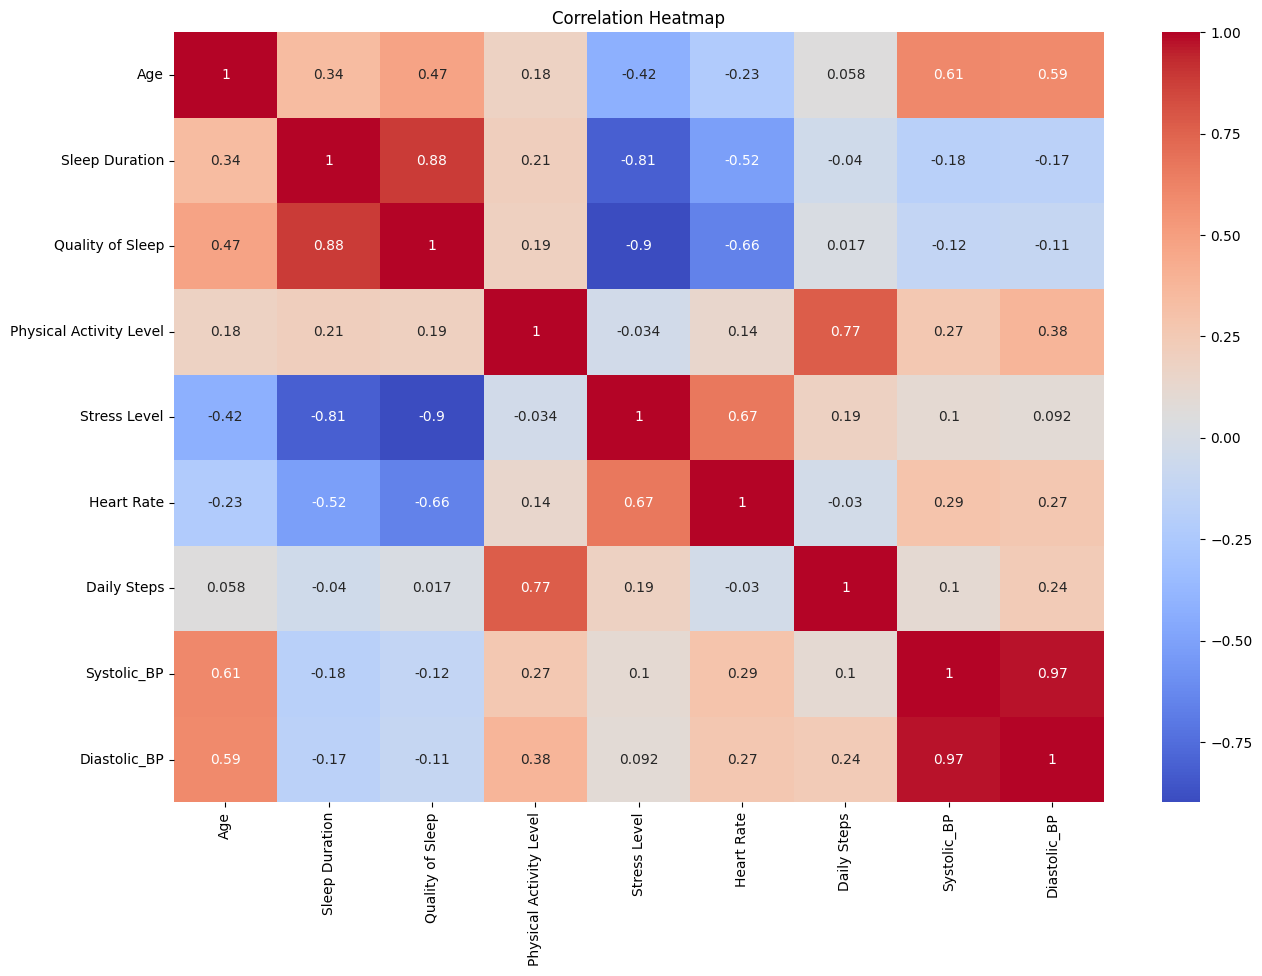

In [58]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




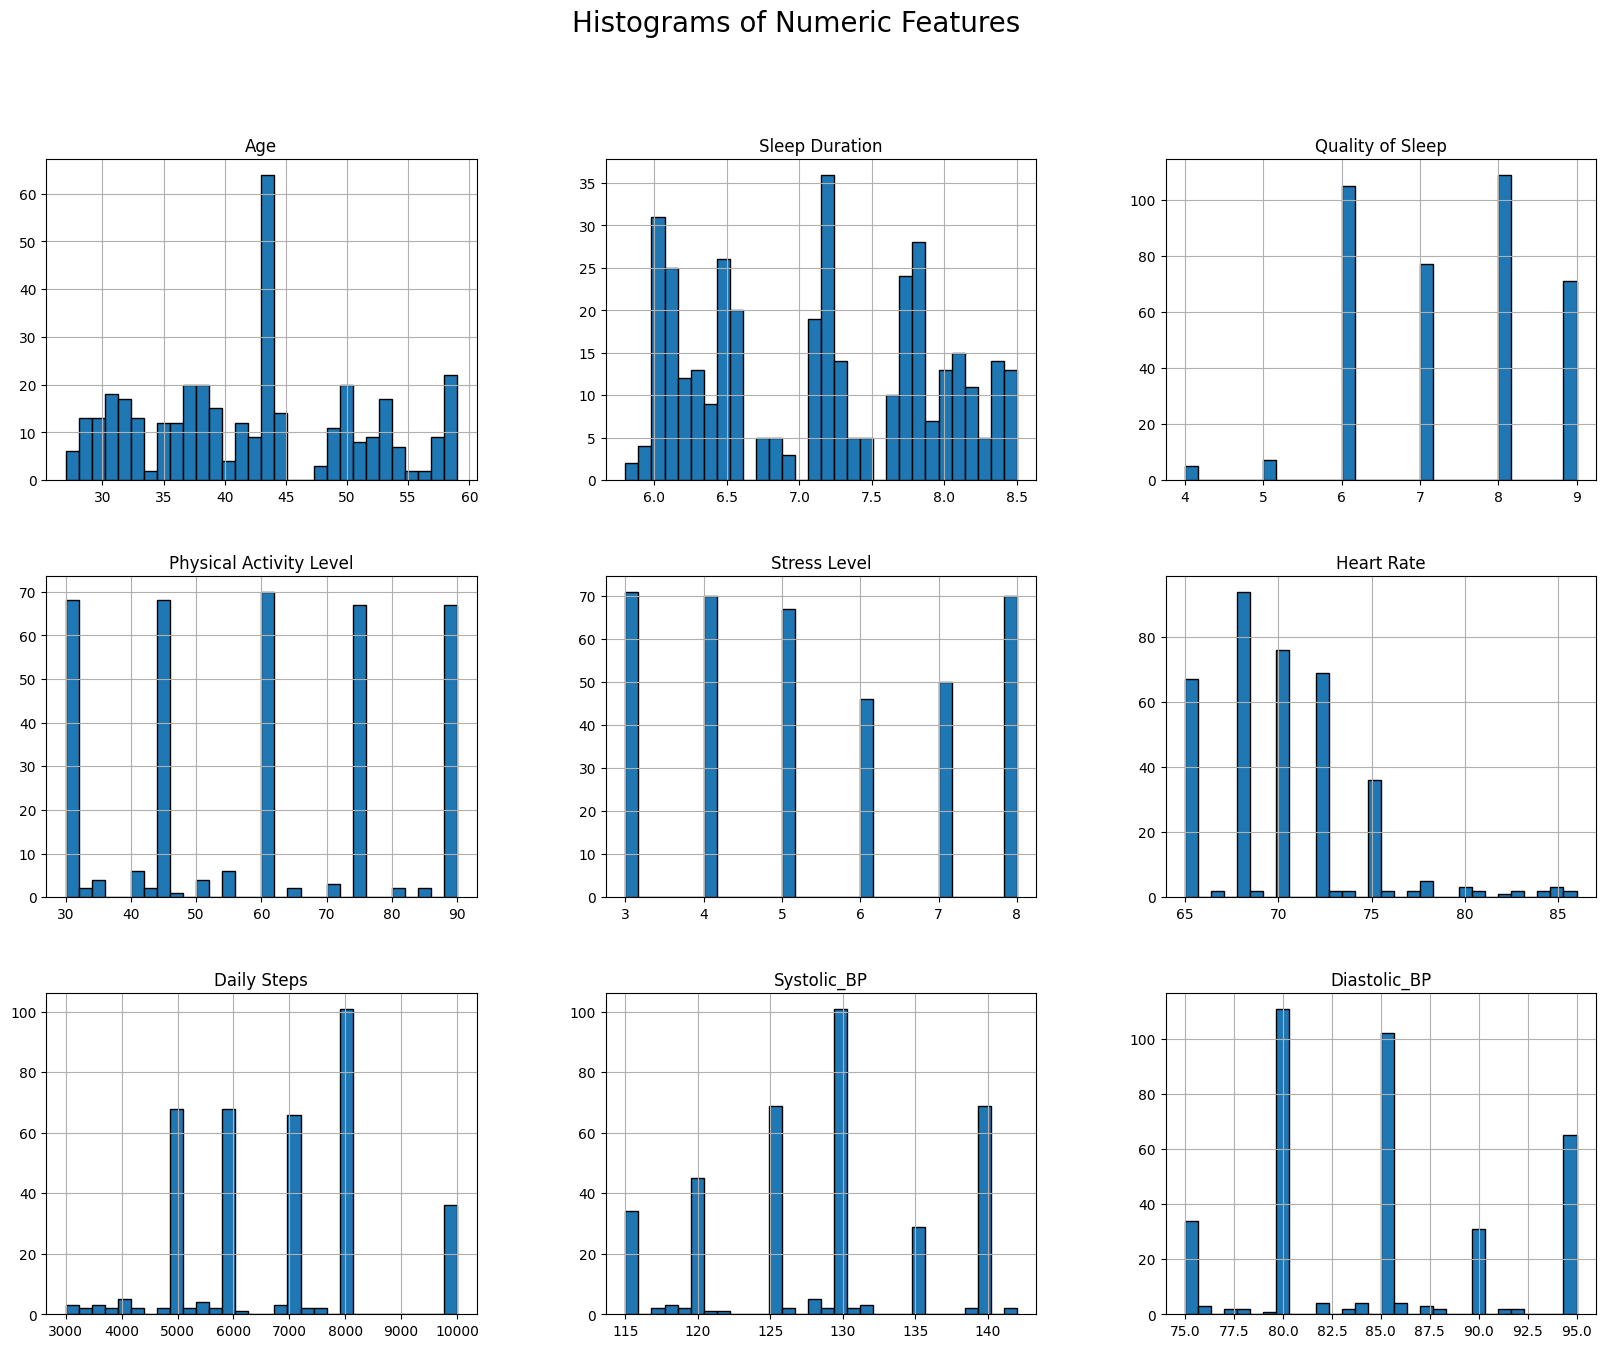

In [59]:
# Plot histograms for all numeric features
numeric_df.hist(figsize=(20,15), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=20)
plt.show()

#You can see how each numeric feature (like Sleep Duration, Heart Rate) is distributed.

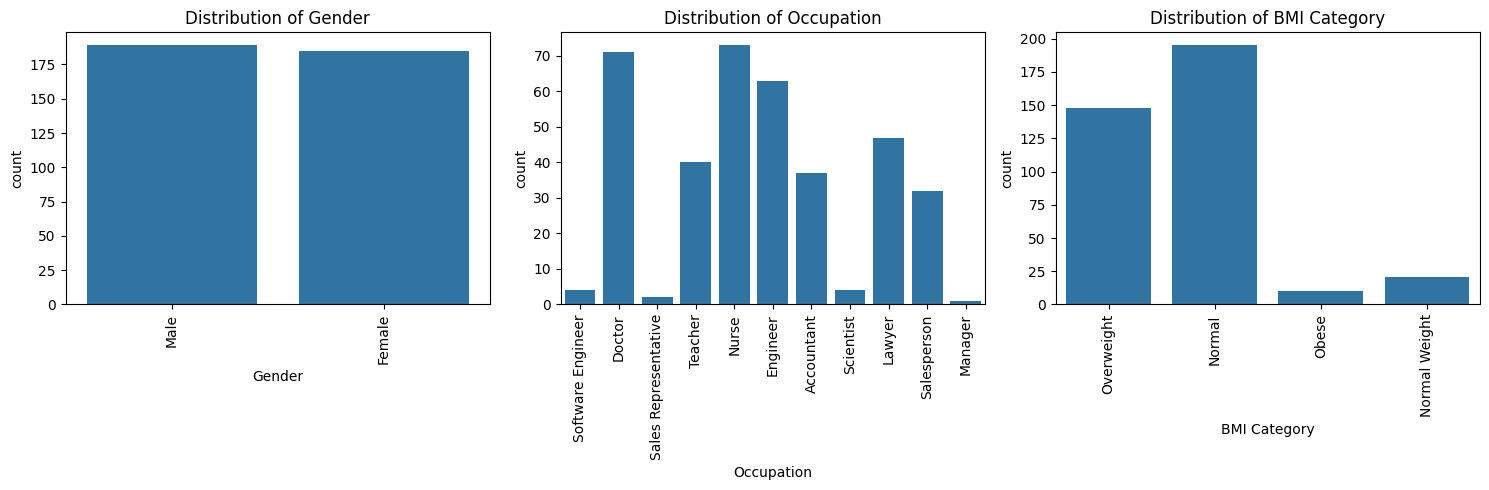

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical features
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Set up the figure with adjusted size for all subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))

# Plot bar plots for each categorical column side by side
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


#In bar plot You'll see how many people in each category.


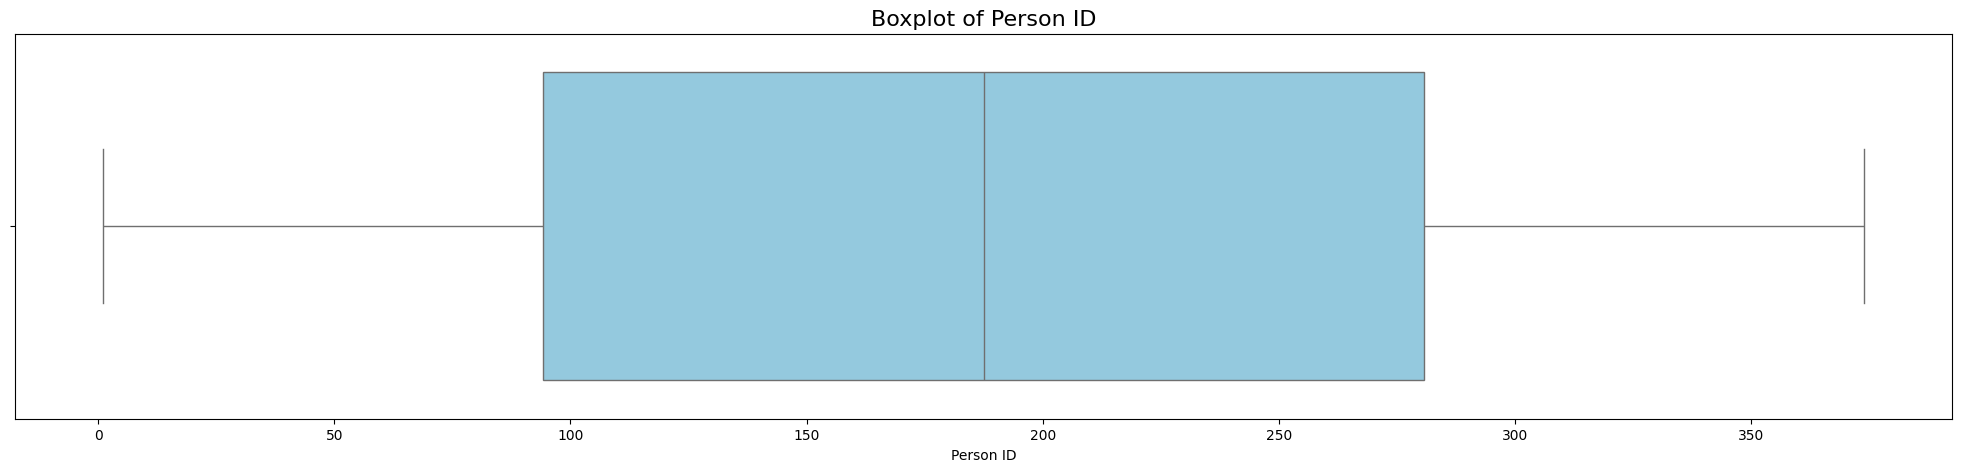

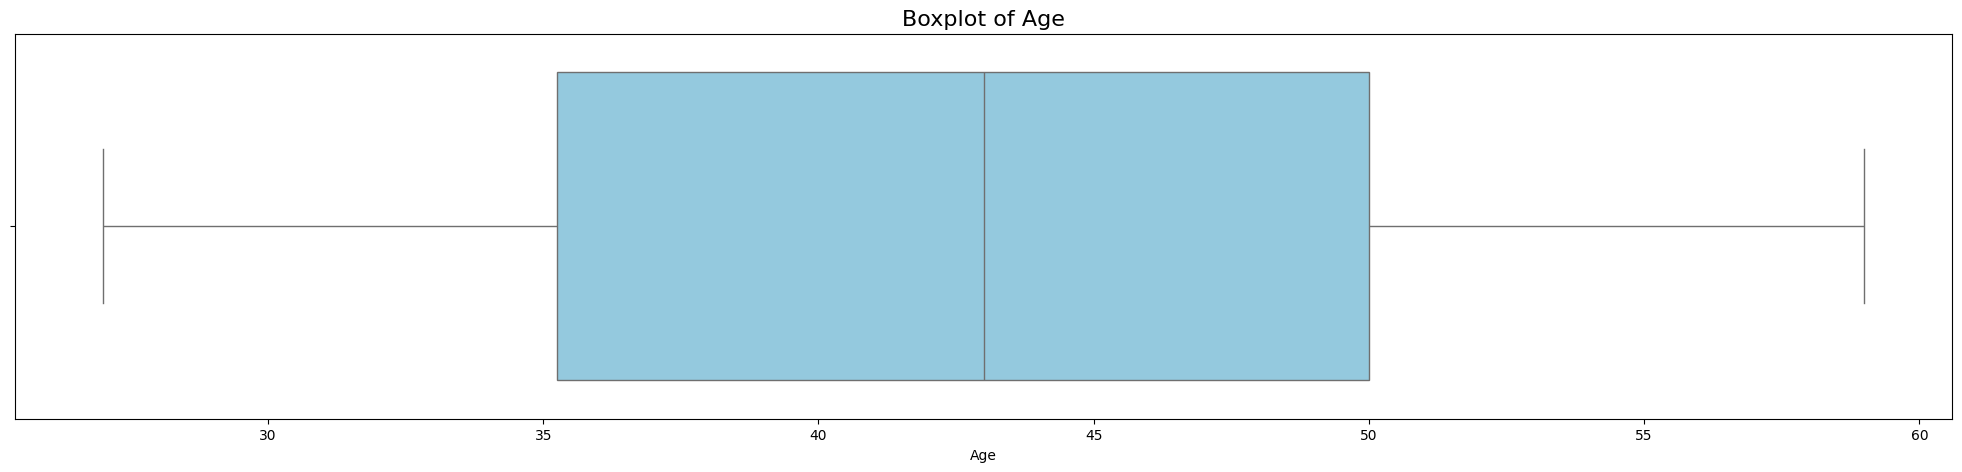

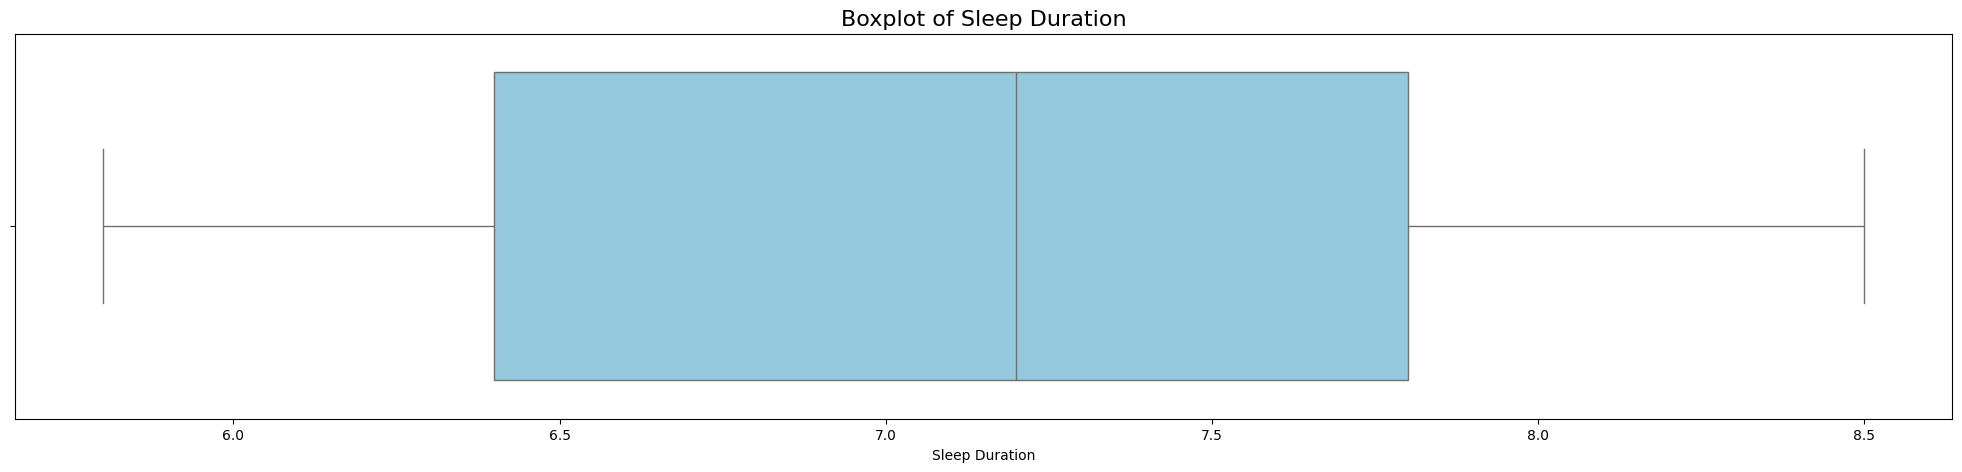

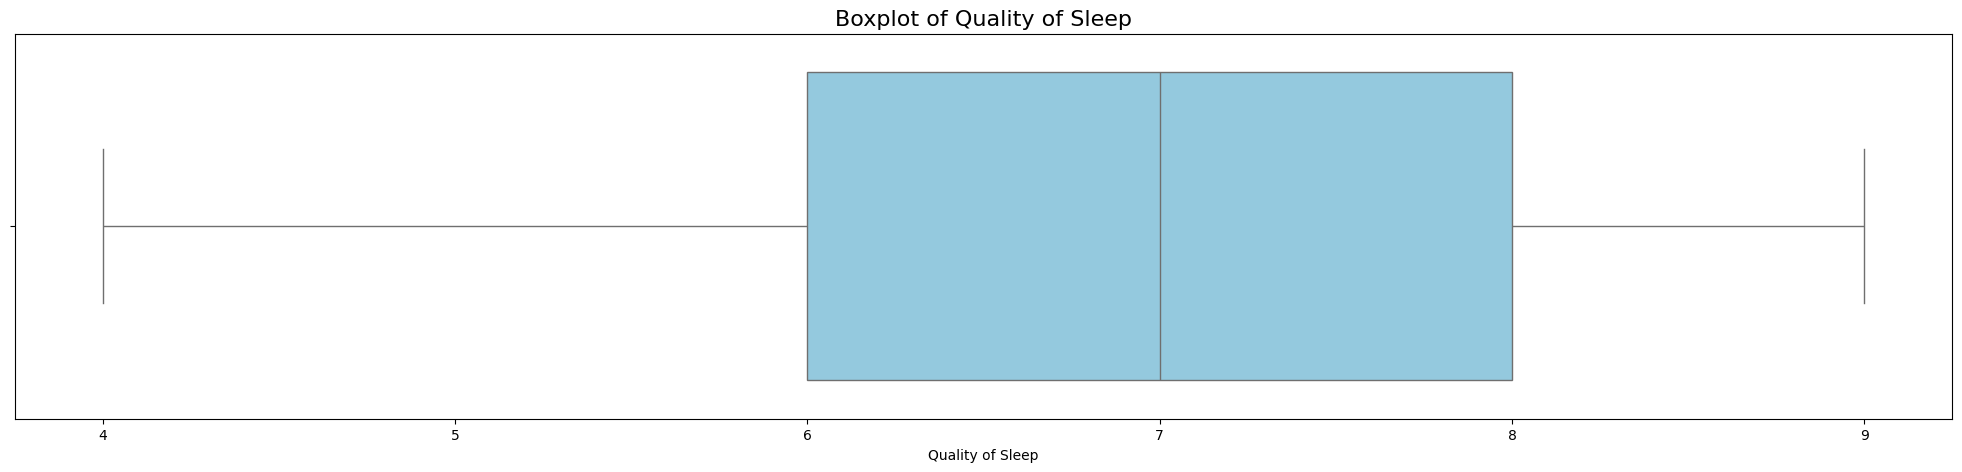

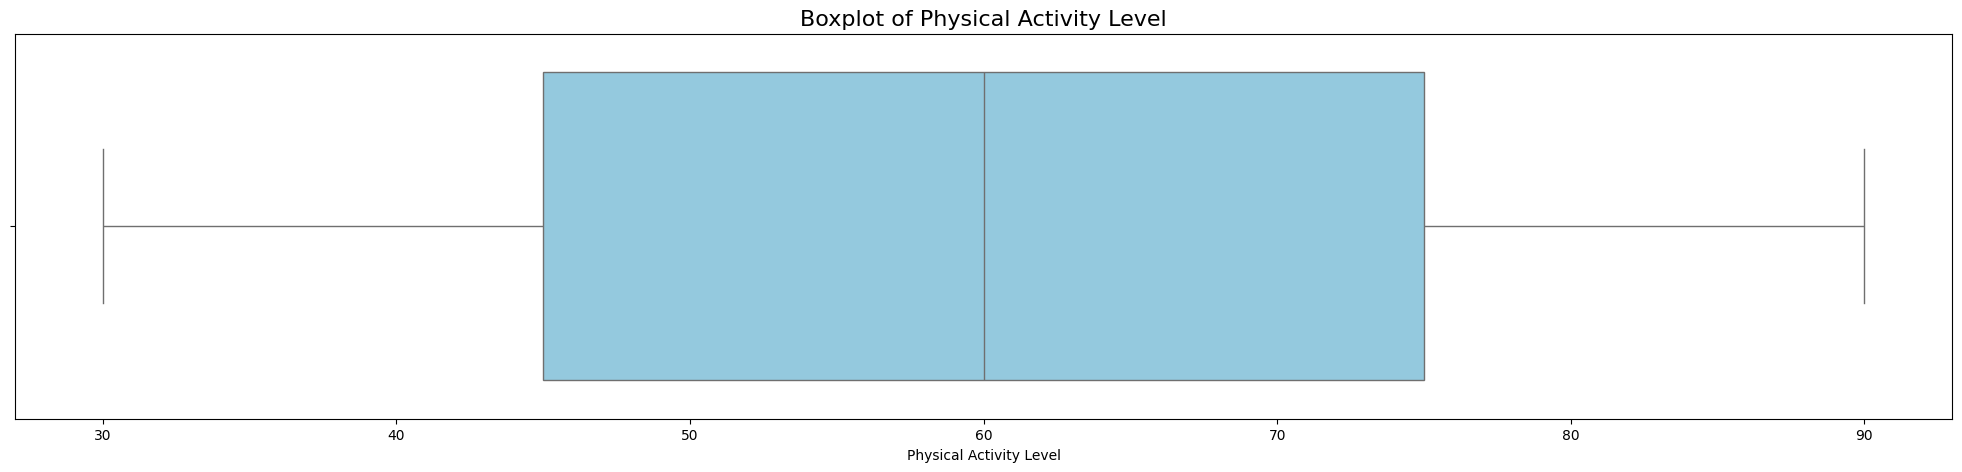

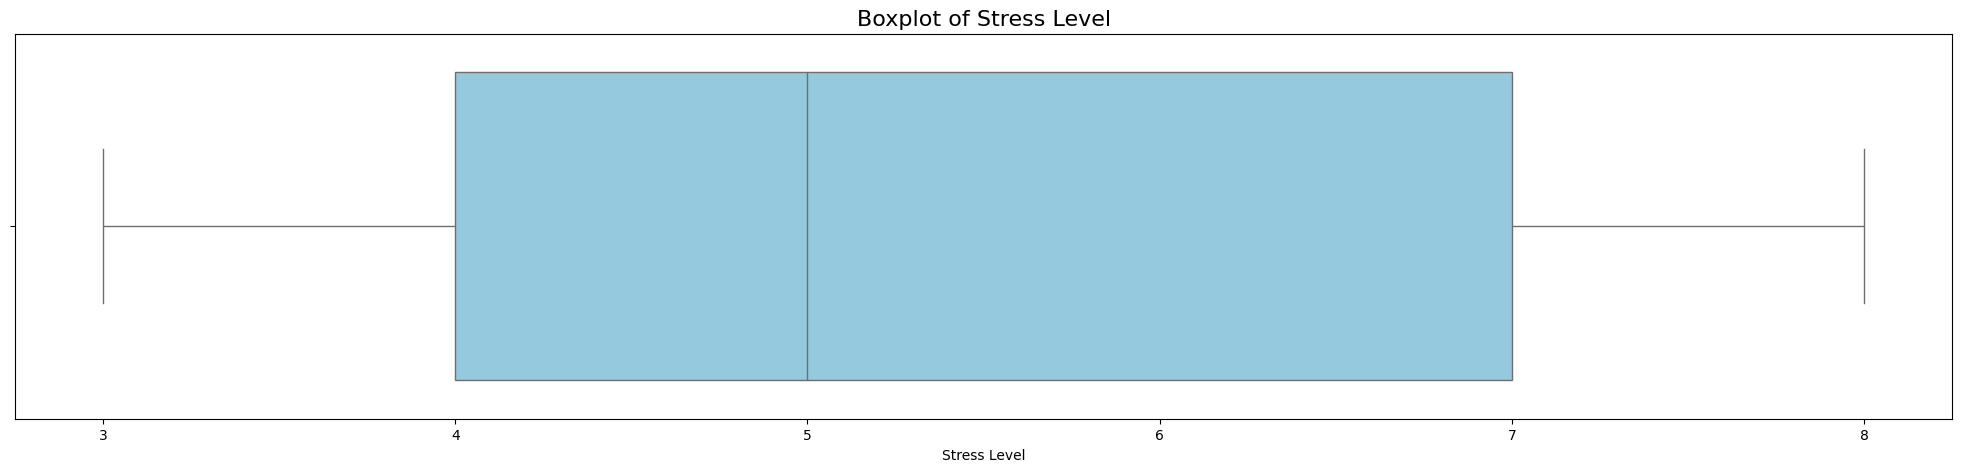

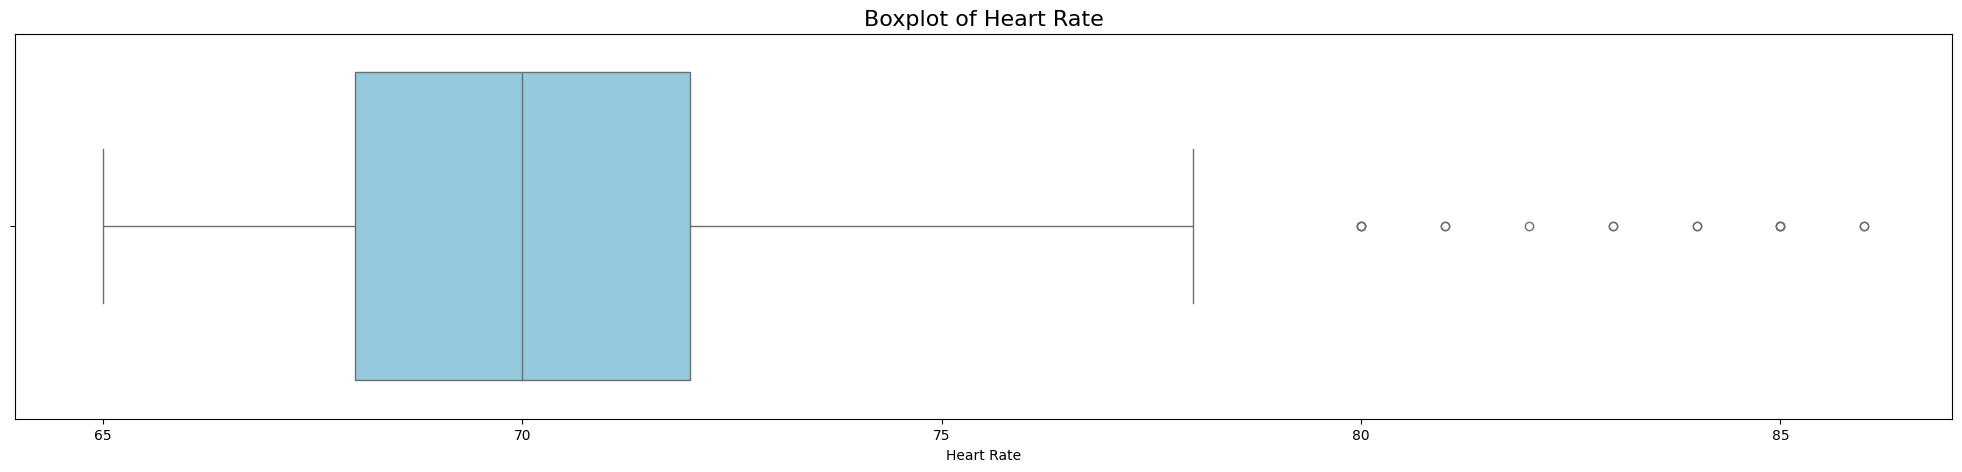

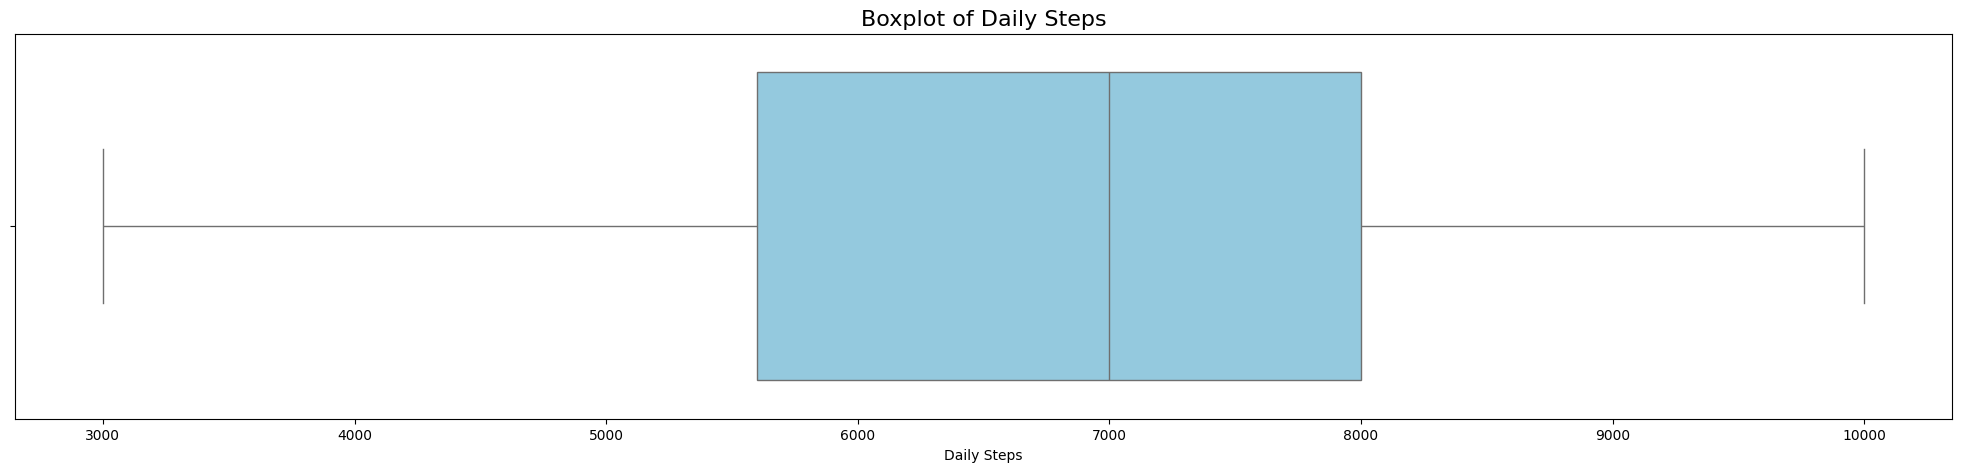

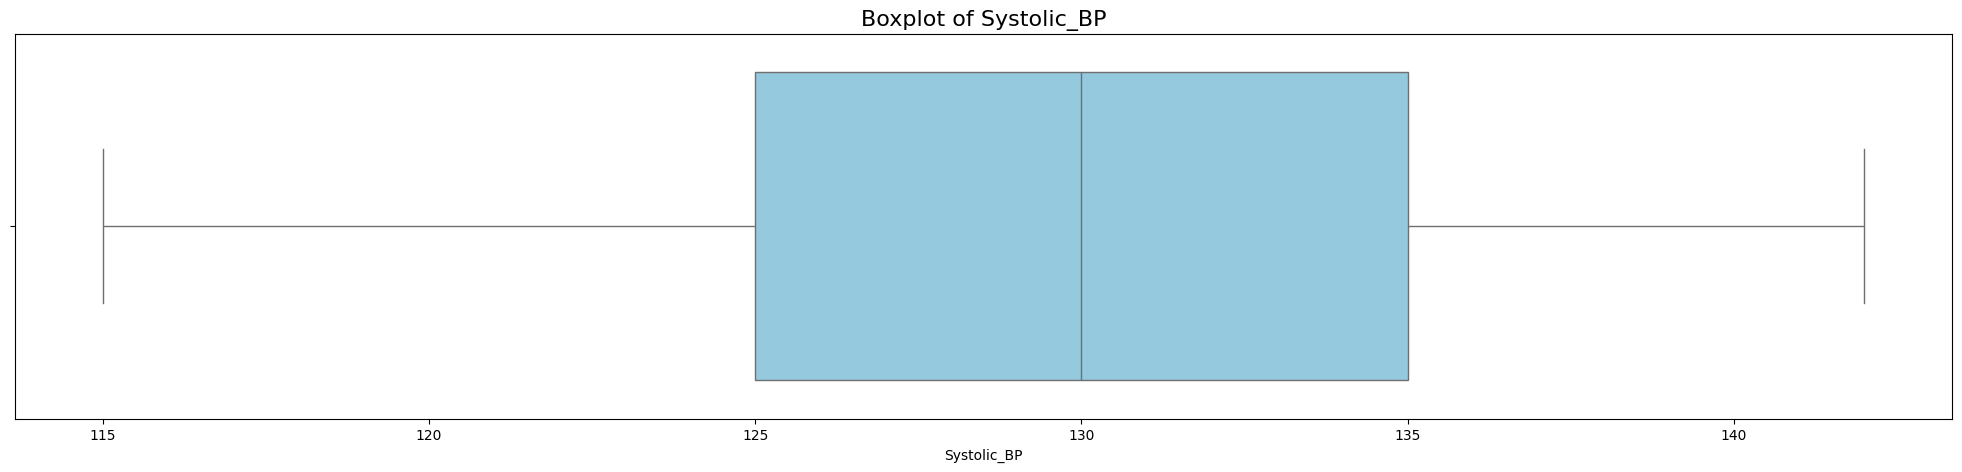

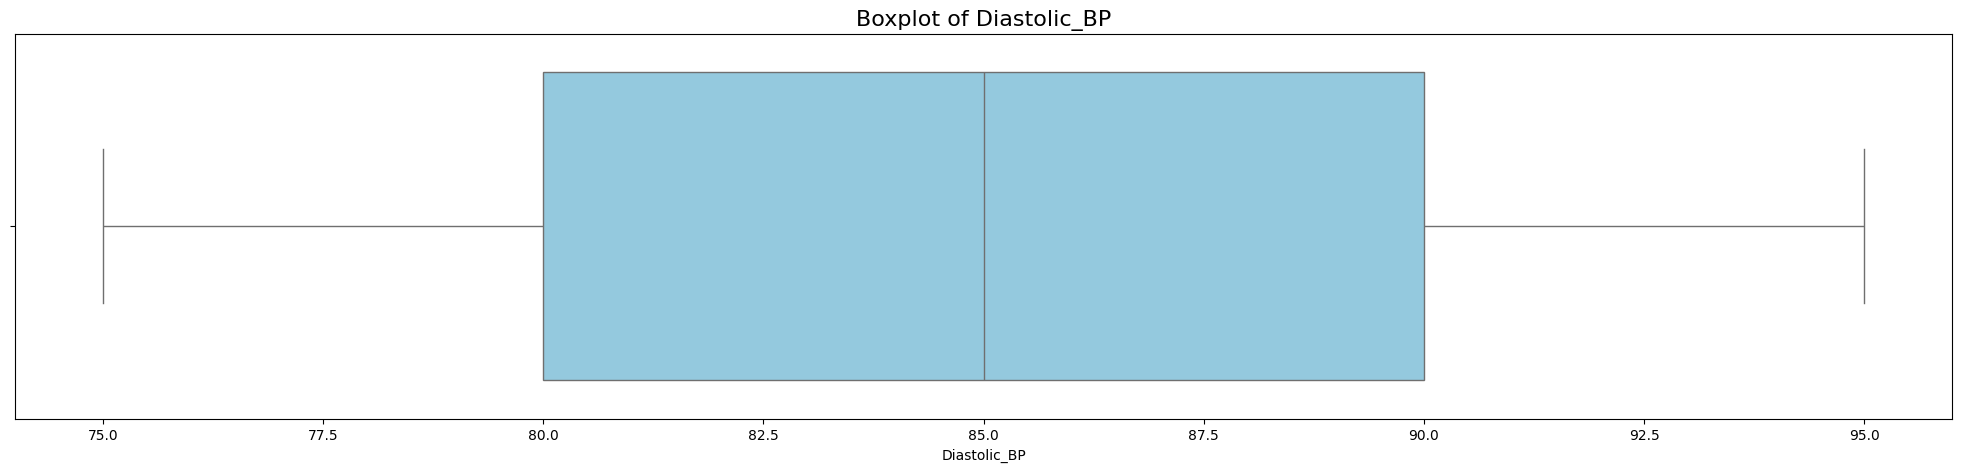

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numeric features
for col in numeric_df.columns:
    plt.figure(figsize=(25, 5))  # ⬅️ Width=25, Height=5
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.show()

#Boxplots help you see outliers — any extreme values popping out.

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
gender_encoder = LabelEncoder()

# Encode Gender (Male=1, Female=0)
df['Gender_encoded'] = gender_encoder.fit_transform(df['Gender'])

display(df[['Gender', 'Gender_encoded']].head())

,Gender,Gender_encoded
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1


In [76]:
# Initialize LabelEncoder
occupation_encoder = LabelEncoder()

# Encode Occupation (assigns numbers alphabetically)
df['Occupation_encoded'] = occupation_encoder.fit_transform(df['Occupation']) + 1  # +1 to start numbering from 1

# Show mapping
occupation_mapping = dict(zip(occupation_encoder.classes_,
                             range(1, len(occupation_encoder.classes_) + 1)))
print("Occupation Encoding Mapping:")
print(occupation_mapping)

# Display results
display(df[['Occupation', 'Occupation_encoded']].head())

Occupation Encoding Mapping:
{'Accountant': 1, 'Doctor': 2, 'Engineer': 3, 'Lawyer': 4, 'Manager': 5, 'Nurse': 6, 'Sales Representative': 7, 'Salesperson': 8, 'Scientist': 9, 'Software Engineer': 10, 'Teacher': 11}


,Occupation,Occupation_encoded
0,Software Engineer,10
1,Doctor,2
2,Doctor,2
3,Sales Representative,7
4,Sales Representative,7


In [77]:
# Drop original categorical columns (keep only encoded versions)
df = df.drop(['Gender', 'Occupation'], axis=1)

# Verify remaining columns
print("Final columns:", df.columns.tolist())
display(df.head())

Final columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Occupation_encoded']


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_encoded
0,1,27,6.1,6,42,6,Overweight,126/83,77,4200,NaN,10
1,2,28,6.2,6,60,8,Normal,125/80,75,10000,NaN,2
2,3,28,6.2,6,60,8,Normal,125/80,75,10000,NaN,2
3,4,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7
4,5,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7


In [88]:
# Select numeric columns (excluding categoricals)
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
print("Numeric columns to analyze:", numeric_cols)

#Calculate IQR Bounds
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower bounds (outliers < these values):")
print(lower_bound)

print("\nUpper bounds (outliers > these values):")
print(upper_bound)

#Detect Outliers
outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
print("\nNumber of outliers per column:")
print(outliers.sum())



Numeric columns to analyze: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Lower bounds (outliers < these values):
Age                          13.125
Sleep Duration                4.300
Quality of Sleep              3.000
Physical Activity Level       0.000
Stress Level                 -0.500
Heart Rate                   62.000
Daily Steps                2000.000
dtype: float64

Upper bounds (outliers > these values):
Age                           72.125
Sleep Duration                 9.900
Quality of Sleep              11.000
Physical Activity Level      120.000
Stress Level                  11.500
Heart Rate                    78.000
Daily Steps                11600.000
dtype: float64

Number of outliers per column:
Age                         0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                 15
Daily Steps        

In [89]:
df_clean = df.copy()
df_clean[numeric_cols] = df_clean[numeric_cols].clip(lower_bound, upper_bound, axis=1)
print("Outliers capped to IQR bounds")

Outliers capped to IQR bounds



Original Stats:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000



Cleaned Stats:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,69.965241,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,3.567258,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,78.000000,10000.000000


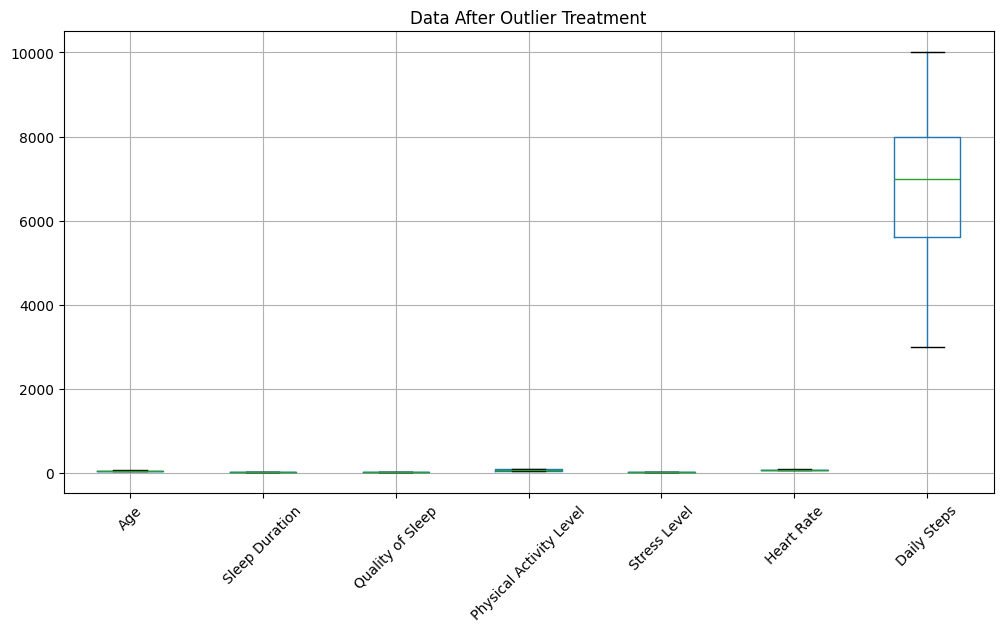

In [90]:
# Compare statistics
print("\nOriginal Stats:")
display(df[numeric_cols].describe())

print("\nCleaned Stats:")
display(df_clean[numeric_cols].describe())

# Visualize cleaned data
plt.figure(figsize=(12, 6))
df_clean[numeric_cols].boxplot()
plt.title("Data After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()